Load the dataset


In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to data folder
data_path = Path("../data")
csv_file = data_path / "cdc_nutrition_obesity.csv"

# Read dataset
df = pd.read_csv(csv_file)

# Preview first rows
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [3]:
me = pd.read_csv(Path("../data/week1_results.csv")).tail(1).iloc[0]
my_bmi = me["BMI"]
print("My BMI:", my_bmi)

My BMI: 25.25


Filter BMI-related data

In [4]:
# BMI rows only, keep relevant cols
bmi_data = df[df["Question"].str.contains("Body Mass Index", case=False, na=False)].copy()
bmi_data = bmi_data[["YearStart", "LocationDesc", "Data_Value"]]

# Make sure values are numeric
bmi_data["Data_Value"] = pd.to_numeric(bmi_data["Data_Value"], errors="coerce")
bmi_data = bmi_data.dropna(subset=["Data_Value"])
bmi_data.head()

,YearStart,LocationDesc,Data_Value


 Group & analyze

In [5]:
# Average BMI by state and year
bmi_summary = bmi_data.groupby(['YearStart', 'LocationDesc'])['Data_Value'].mean().reset_index()

bmi_summary.head()

bmi_data["LocationDesc"].nunique(), (bmi_data["LocationDesc"] == "Minnesota").sum()
# peek a few rows for Minnesota
bmi_data[bmi_data["LocationDesc"] == "Minnesota"].head()

,YearStart,LocationDesc,Data_Value


Visualization

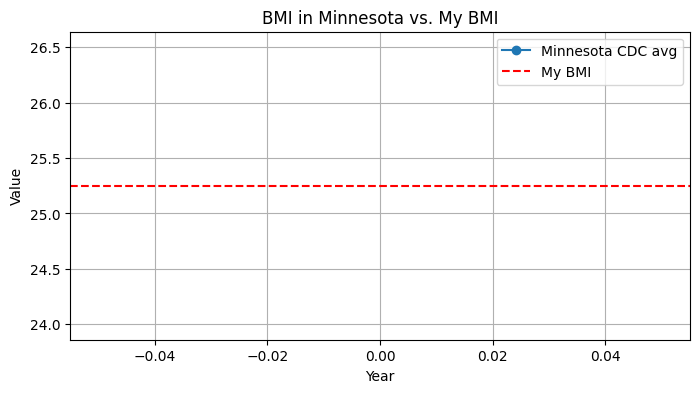

In [6]:
import matplotlib.pyplot as plt

state = "Minnesota"
state_data = (
    bmi_data[bmi_data["LocationDesc"] == state]
    .groupby("YearStart", as_index=False)["Data_Value"]
    .mean()
    .sort_values("YearStart")
)

plt.figure(figsize=(8, 4))
plt.plot(state_data["YearStart"], state_data["Data_Value"], label=f"{state} CDC avg", marker="o")
plt.axhline(my_bmi, color="red", linestyle="--", label="My BMI")
plt.title(f"BMI in {state} vs. My BMI")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()